# Understanding filters and convolutions
Tecnun - 2023<p>

## Importing libraries

In [1]:
import pandas as pd
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.image import rgb_to_grayscale
from tensorflow.keras.models import Model
from matplotlib import pyplot
import numpy as np
from numpy import expand_dims
from PIL import Image
import cv2

import warnings
warnings.filterwarnings('ignore')

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Create vertical filter
On these following steps we are going to manually create a couple of filters. The first one to detect vertical lines and the second one to detect horizontal lines.

In [ ]:
filter = np.zeros((3,3))
filter

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
filter[0, 0] = 1
filter[1, 0] = 1
filter[2, 0] = 1
filter[0, 2] = -1
filter[1, 2] = -1
filter[2, 2] = -1
filter

array([[ 1.,  0., -1.],
       [ 1.,  0., -1.],
       [ 1.,  0., -1.]])

It is always recommended to divide the filter by the sum of absolute values of its content

In [ ]:
filter = filter*(1/6)
filter

array([[ 0.16666667,  0.        , -0.16666667],
       [ 0.16666667,  0.        , -0.16666667],
       [ 0.16666667,  0.        , -0.16666667]])

Converting the filter to 255 to visualize

In [ ]:
np.uint8(filter*255)

array([[ 42,   0, 214],
       [ 42,   0, 214],
       [ 42,   0, 214]], dtype=uint8)

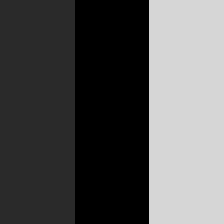

In [ ]:
im = Image.fromarray(np.uint8(filter*255))
im.resize((224,224),resample=0)

The following image is created by a Deep fake GAN. It creates faces of person that don't exist.<p>
<p>
We are going to load this image on a target of 224 by 224. Why this number?

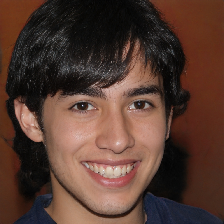

In [ ]:
image = load_img("/content/drive/MyDrive/Colab_Notebooks/Computer Vision course/DL/images/MalePicture.jpg" , target_size=(224,224))
image

We could also load it on grayscale

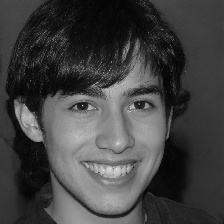

In [ ]:
gray_image = load_img("/content/drive/MyDrive/Colab_Notebooks/Computer Vision course/DL/images/MalePicture.jpg" , target_size=(224,224), color_mode='grayscale')
gray_image

Verifying element wise product on numpy

In [ ]:
x = np.array((2,2))
y = np.array((2,2))
x = [[2,2],[3,3]]
y = [[2,3],[2,3]]
np.multiply(x,y)

array([[4, 6],
       [6, 9]])

Remembering slicing ranges in numpy [initial_index, final_index)

In [ ]:
x = np.arange(5)
print(x)
print(x[1:4])

[0 1 2 3 4]
[1 2 3]


# Convolution operation
Element wise product and sum of all elements

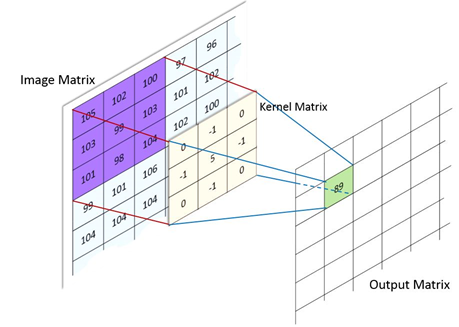

In [ ]:
def manual_convolution(orig_image, filter):
    image_filtered = np.multiply(orig_image,filter)
    return np.sum(image_filtered)

## Calculating the final volume of the image

$$Volume = \dfrac{W - K + 2P}{S} + 1$$

$$Volume = \dfrac{224 - 3 + 2\times0}{1} + 1 = 222 $$

In [ ]:
filtered_image = np.zeros((222,222,3),dtype=np.uint8)

Performing a convolution operation manually

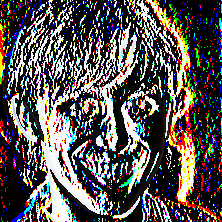

In [ ]:
# Step 1 converting image to numpy array
image = np.array(image)

# Step 2 Apply a correction to avoid the right and bottom borders
for i in range(1, image.shape[0] - 1):
    for j in range(1, image.shape[1] - 1):
        # Step 3 process every channel, in a loop or one by one
        #        Extracting the region to multiply
        region_image_r = image[i-1:i+2, j-1:j+2, 0]
        region_image_g = image[i-1:i+2, j-1:j+2, 1]
        region_image_b = image[i-1:i+2, j-1:j+2, 2]

        # Step 4 process every channel, in a loop or one by one
        #        Applying the convolution manually to the new image
        filtered_image[i-1, j-1, 0] = manual_convolution(region_image_r, filter)
        filtered_image[i-1, j-1, 1] = manual_convolution(region_image_g, filter)
        filtered_image[i-1, j-1, 2] = manual_convolution(region_image_b, filter)

#Step 5 Verify the new Image, converting from numpy to PIL
#pyplot.imshow(filtered_image[:,:,::-1])
newImg = Image.fromarray(filtered_image)
newImg

Applying the same as before but with grayscale image

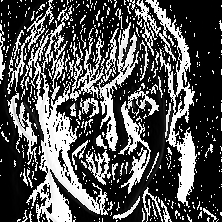

In [ ]:
# Only 1 channel in this case
filtered_image = np.zeros((222,222),dtype=np.uint8)

# Correction to avoid the right and bottom borders
gray_image = np.array(gray_image)
for i in range(1, image.shape[0] - 1):
    for j in range(1, image.shape[1] - 1):
        region_image_r = gray_image[i-1:i+2, j-1:j+2]

        filtered_image[i-1, j-1] = manual_convolution(region_image_r, filter)

newImg = Image.fromarray(filtered_image)
newImg

## Applying a horizontal filter
Let's create the horizontal filter!

In [ ]:
hfilter = np.zeros((3,3))
hfilter[0, 0] = 1
hfilter[0, 1] = 1
hfilter[0, 2] = 1
hfilter[2, 0] = -1
hfilter[2, 1] = -1
hfilter[2, 2] = -1
hfilter = hfilter*(1/6)
hfilter

array([[ 0.16666667,  0.16666667,  0.16666667],
       [ 0.        ,  0.        ,  0.        ],
       [-0.16666667, -0.16666667, -0.16666667]])

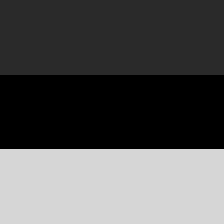

In [ ]:
im = Image.fromarray(np.uint8(hfilter*255))
im.resize((224,224),resample=0)

255 0


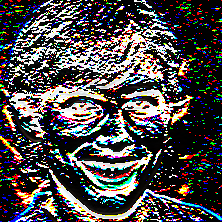

In [ ]:
filtered_image = np.zeros((222,222,3),dtype=np.uint8)

# Correction to avoid the right and bottom borders
image = np.array(image)
for i in range(1, image.shape[0] - 1):
    for j in range(1, image.shape[1] - 1):
        region_image_r = image[i-1:i+2, j-1:j+2, 0]
        region_image_g = image[i-1:i+2, j-1:j+2, 1]
        region_image_b = image[i-1:i+2, j-1:j+2, 2]

        filtered_image[i-1, j-1] = manual_convolution(region_image_r, hfilter)
        filtered_image[i-1, j-1, 1] = manual_convolution(region_image_g, hfilter)
        filtered_image[i-1, j-1, 2] = manual_convolution(region_image_b, hfilter)

print(filtered_image.max(), filtered_image.min())
newImg = Image.fromarray(filtered_image)
newImg

# Model Kernel visualization
Using a VGG Model pre-trained to check what it sees on the convolutions

## The model
![VGG16](https://qph.fs.quoracdn.net/main-qimg-e657c195fc2696c7d5fc0b1e3682fde6)
VGG architecture

In [2]:
#Load the model
model = VGG16()

# Summary of the model
model.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

VGG is not a light architecture, but it is effective. On the following step we will keep only with the convolution names blocks

In [3]:
for layer in model.layers:

    if 'conv' not in layer.name:
        continue
    filters , bias = layer.get_weights()
    print(layer.name , filters.shape)

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


In [4]:
# retrieve weights from the second hidden layer
# "0" means the first 3x3x3 of the 64 filters
filters , bias = model.layers[1].get_weights()
print(filters[:,:,:,0])

[[[ 0.42947057  0.55037946  0.4800154 ]
  [ 0.373467    0.44007453  0.4085474 ]
  [-0.06136011 -0.08138704 -0.06514555]]

 [[ 0.27476987  0.34573907  0.31047726]
  [ 0.03868078  0.04063221  0.05020237]
  [-0.36722335 -0.4535013  -0.40338343]]

 [[-0.05746817 -0.05863491 -0.05087169]
  [-0.26224968 -0.33066967 -0.2852275 ]
  [-0.35009676 -0.4850302  -0.41851634]]]


In [9]:
filters.shape

(3, 3, 3, 64)

In [10]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
print(filters[:,:,:,0])

f=filters[:,:,:,0]
print("R channel")
print(f[:,:,0])
print("G channel")
print(f[:,:,1])
print("B channel")
print(f[:,:,2])

[[[0.8601116  0.9545779  0.89960235]
  [0.81635594 0.8683965  0.8437643 ]
  [0.47662497 0.4609779  0.4736674 ]]

 [[0.7392438  0.7946921  0.767142  ]
  [0.55478704 0.55631167 0.5637889 ]
  [0.23765364 0.17024457 0.20940173]]

 [[0.47966576 0.47875416 0.48481962]
  [0.31966972 0.2662131  0.3017171 ]
  [0.25103468 0.145611   0.19757837]]]
R channel
[[0.8601116  0.81635594 0.47662497]
 [0.7392438  0.55478704 0.23765364]
 [0.47966576 0.31966972 0.25103468]]
G channel
[[0.9545779  0.8683965  0.4609779 ]
 [0.7946921  0.55631167 0.17024457]
 [0.47875416 0.2662131  0.145611  ]]
B channel
[[0.89960235 0.8437643  0.4736674 ]
 [0.767142   0.5637889  0.20940173]
 [0.48481962 0.3017171  0.19757837]]


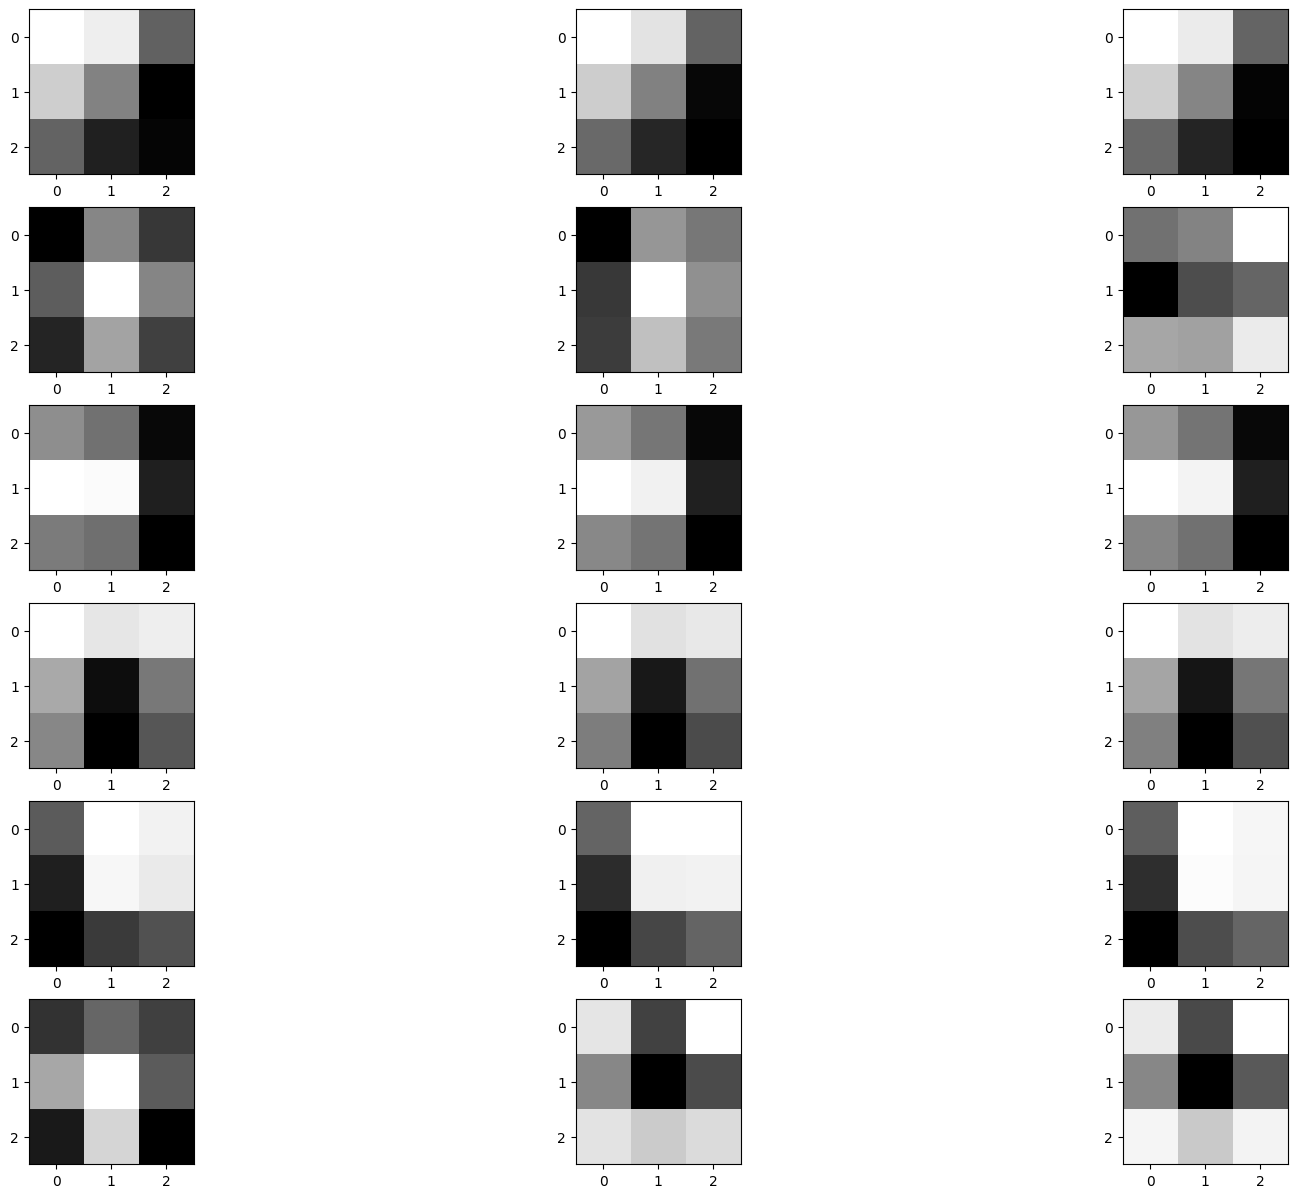

In [11]:
n_filters = 6
ix=1
fig = pyplot.figure(figsize=(20,15))
for i in range(n_filters):
    # get the filters
    f = filters[:,:,:,i]
    for j in range(3):
        # subplot for 6 filters and 3 channels
        pyplot.subplot(n_filters,3,ix)
        pyplot.imshow(f[:,:,j] ,cmap='gray')
        ix+=1
#plot the filters
pyplot.show()

## Plotting the filters on many layers

 ### Listing all the convolution blocks to check what they extract on each

In [12]:
for i in range(len(model.layers)):
    layer = model.layers[i]
    if 'conv' not in layer.name:
        continue
    print(i , layer.name , layer.output.shape)

1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)


### Step 1: Load the model

In [13]:
model = Model(inputs=model.inputs , outputs=model.layers[1].output)

### Step 2: Load the image

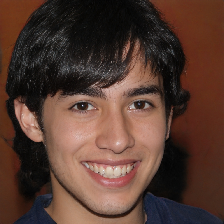

In [15]:
image = load_img("/content/drive/MyDrive/Colab_Notebooks/Computer Vision course/DL/images/MalePicture.jpg" , target_size=(224,224))
image

### Step 3 A and B:
A) Convert the image to a numpy array. <p>
B) Create a new 'fake' dimension. This new dimension is related to the batch size.

In [16]:
# convert the image to an array
image = img_to_array(image)
# expand dimensions so that it represents a single 'sample'
image = expand_dims(image, axis=0)

### Step 4: The image array needs to be normalized and a tensor (GPU)

In [17]:
image = preprocess_input(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


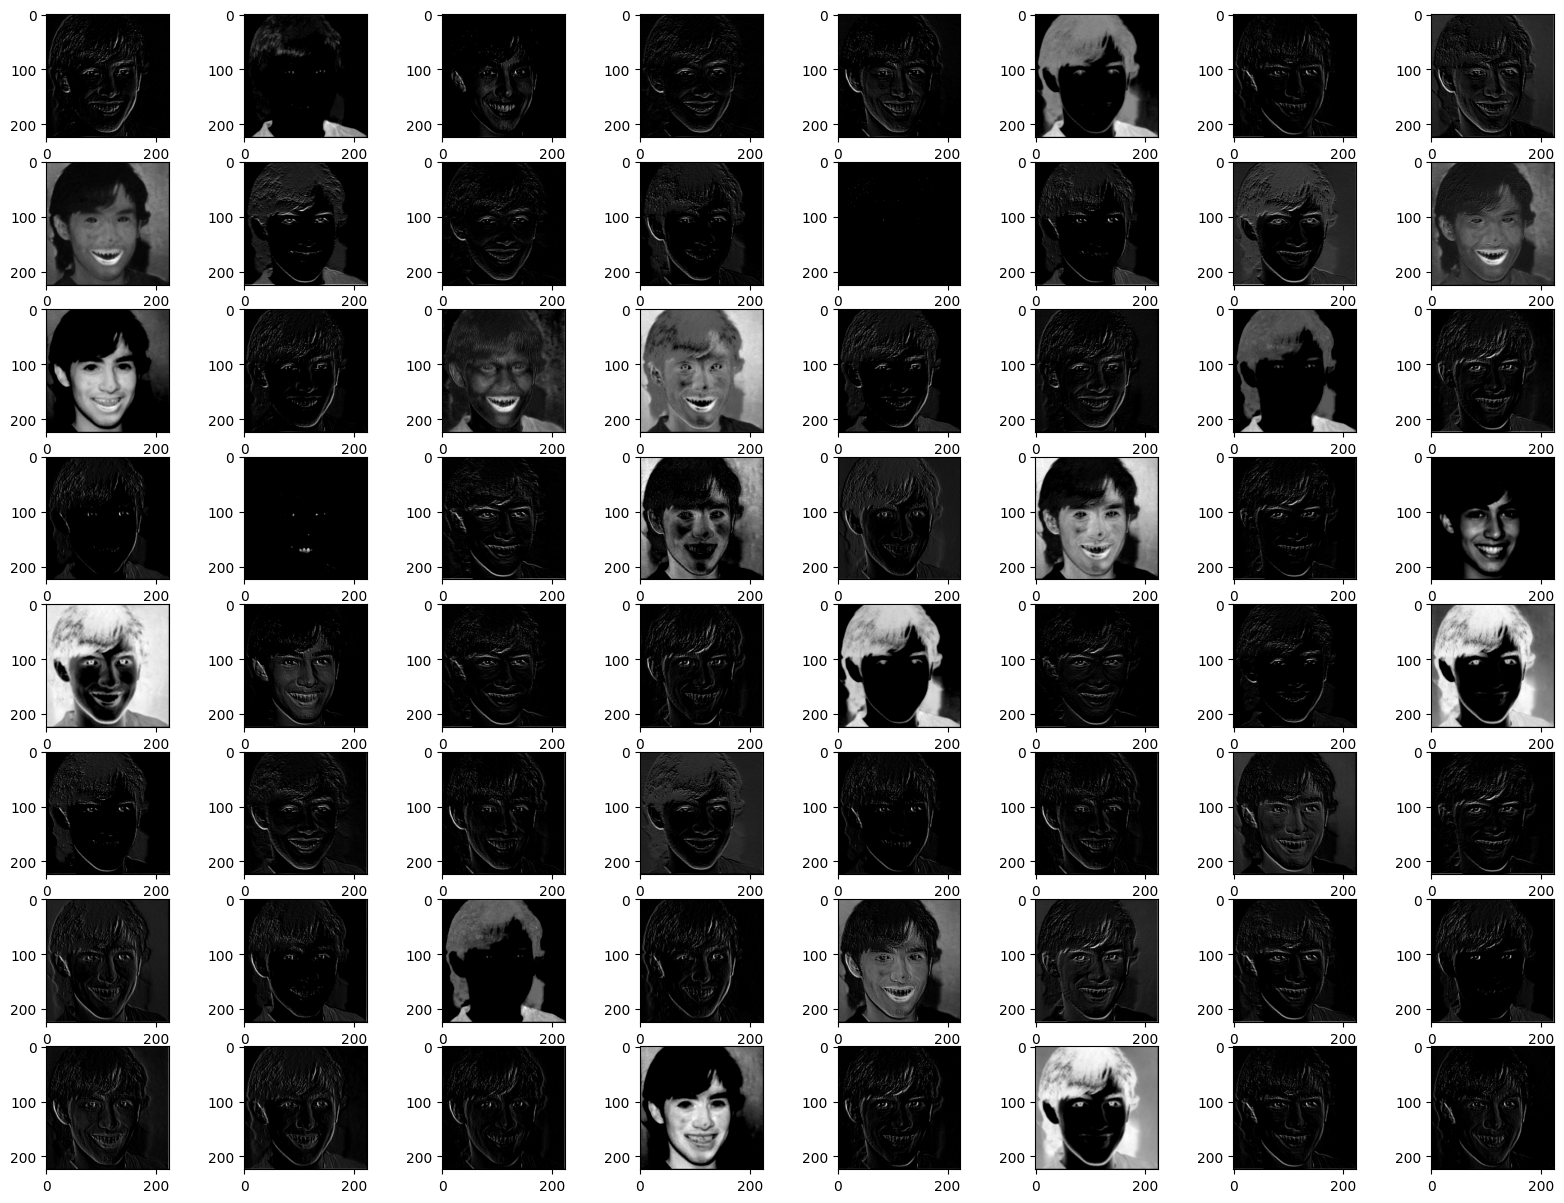

In [18]:
#calculating features_map
features = model.predict(image)

fig = pyplot.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):

    pyplot.subplot(8,8,i)
    pyplot.imshow(features[0,:,:,i-1] , cmap='gray')

pyplot.show()

### Optional step: Check some the layers (2, 5, 9, 13, 17)

In [20]:
model2 = VGG16()

In [21]:
blocks = [ 2, 5 , 9 , 13 , 17]
outputs = [model2.layers[i].output for i in blocks]

model2 = Model( inputs= model2.inputs, outputs = outputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


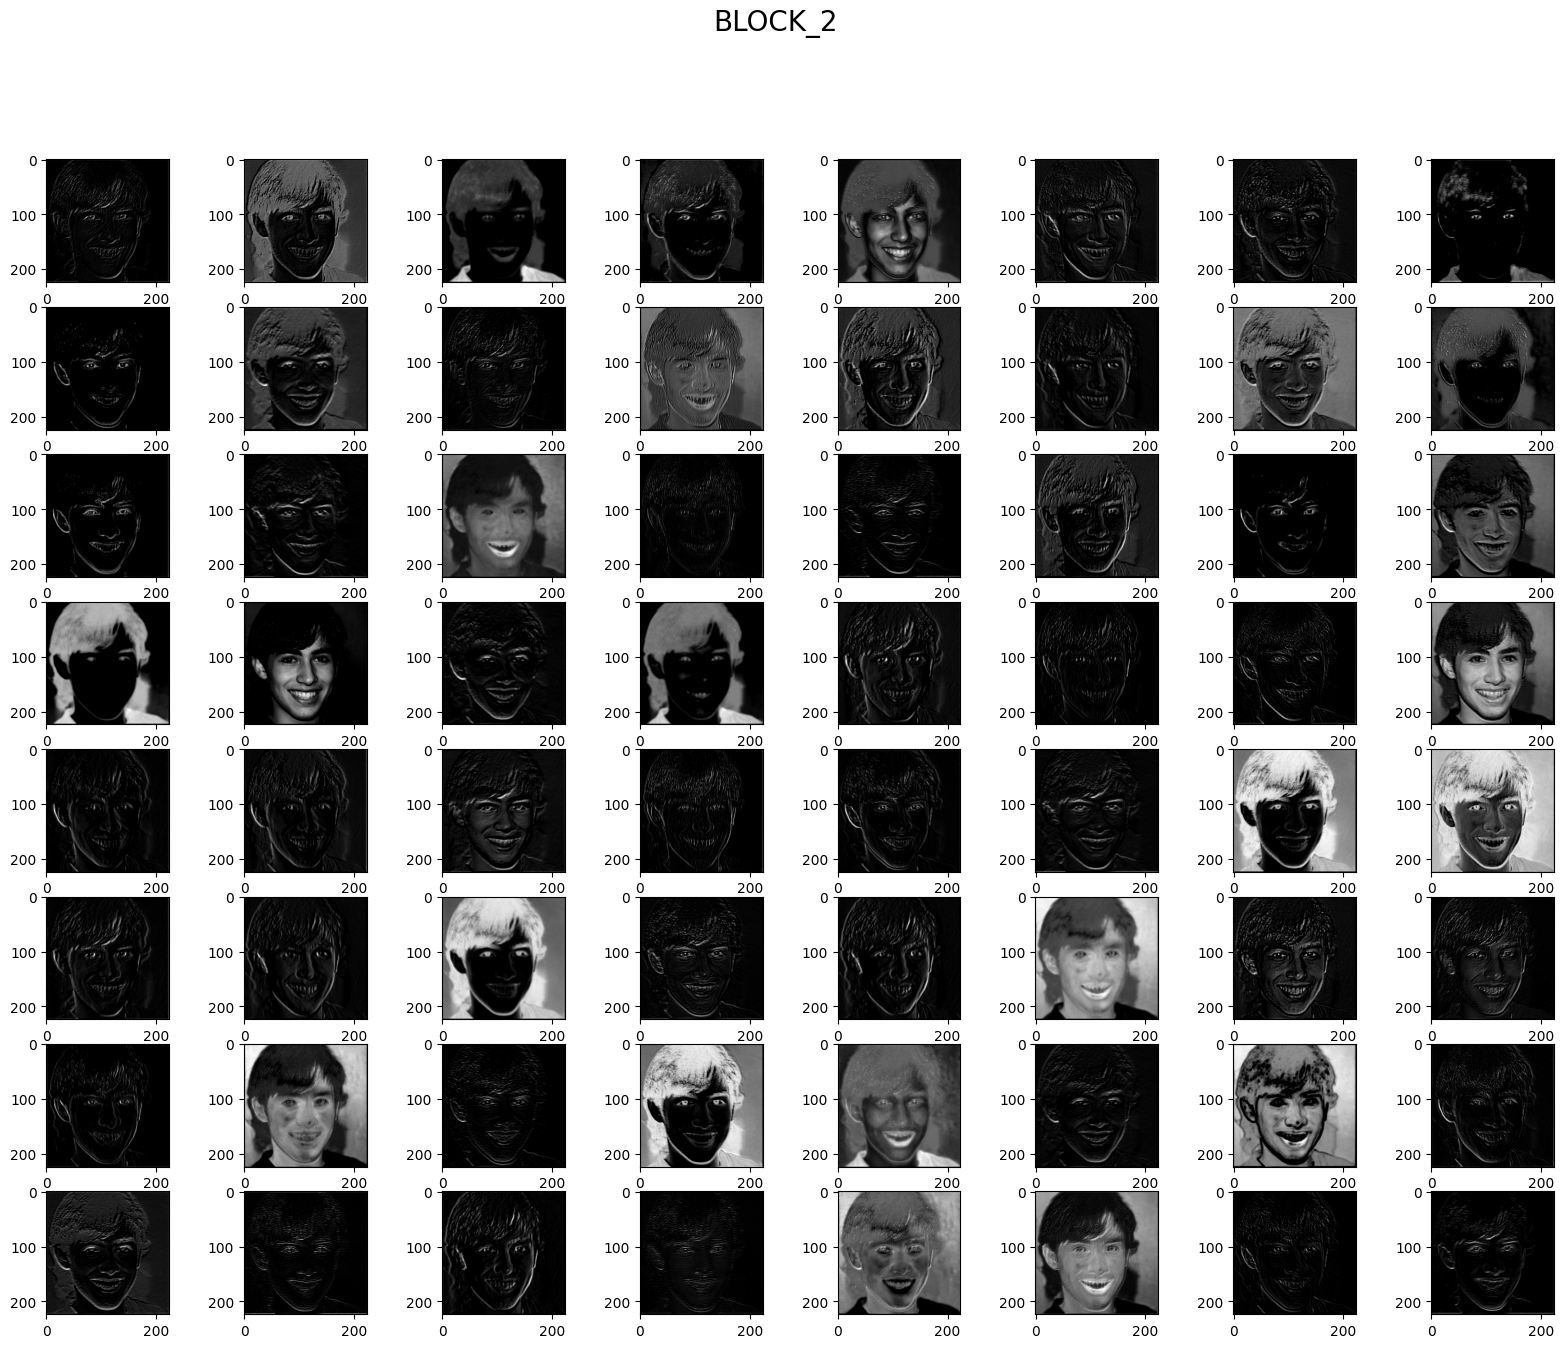

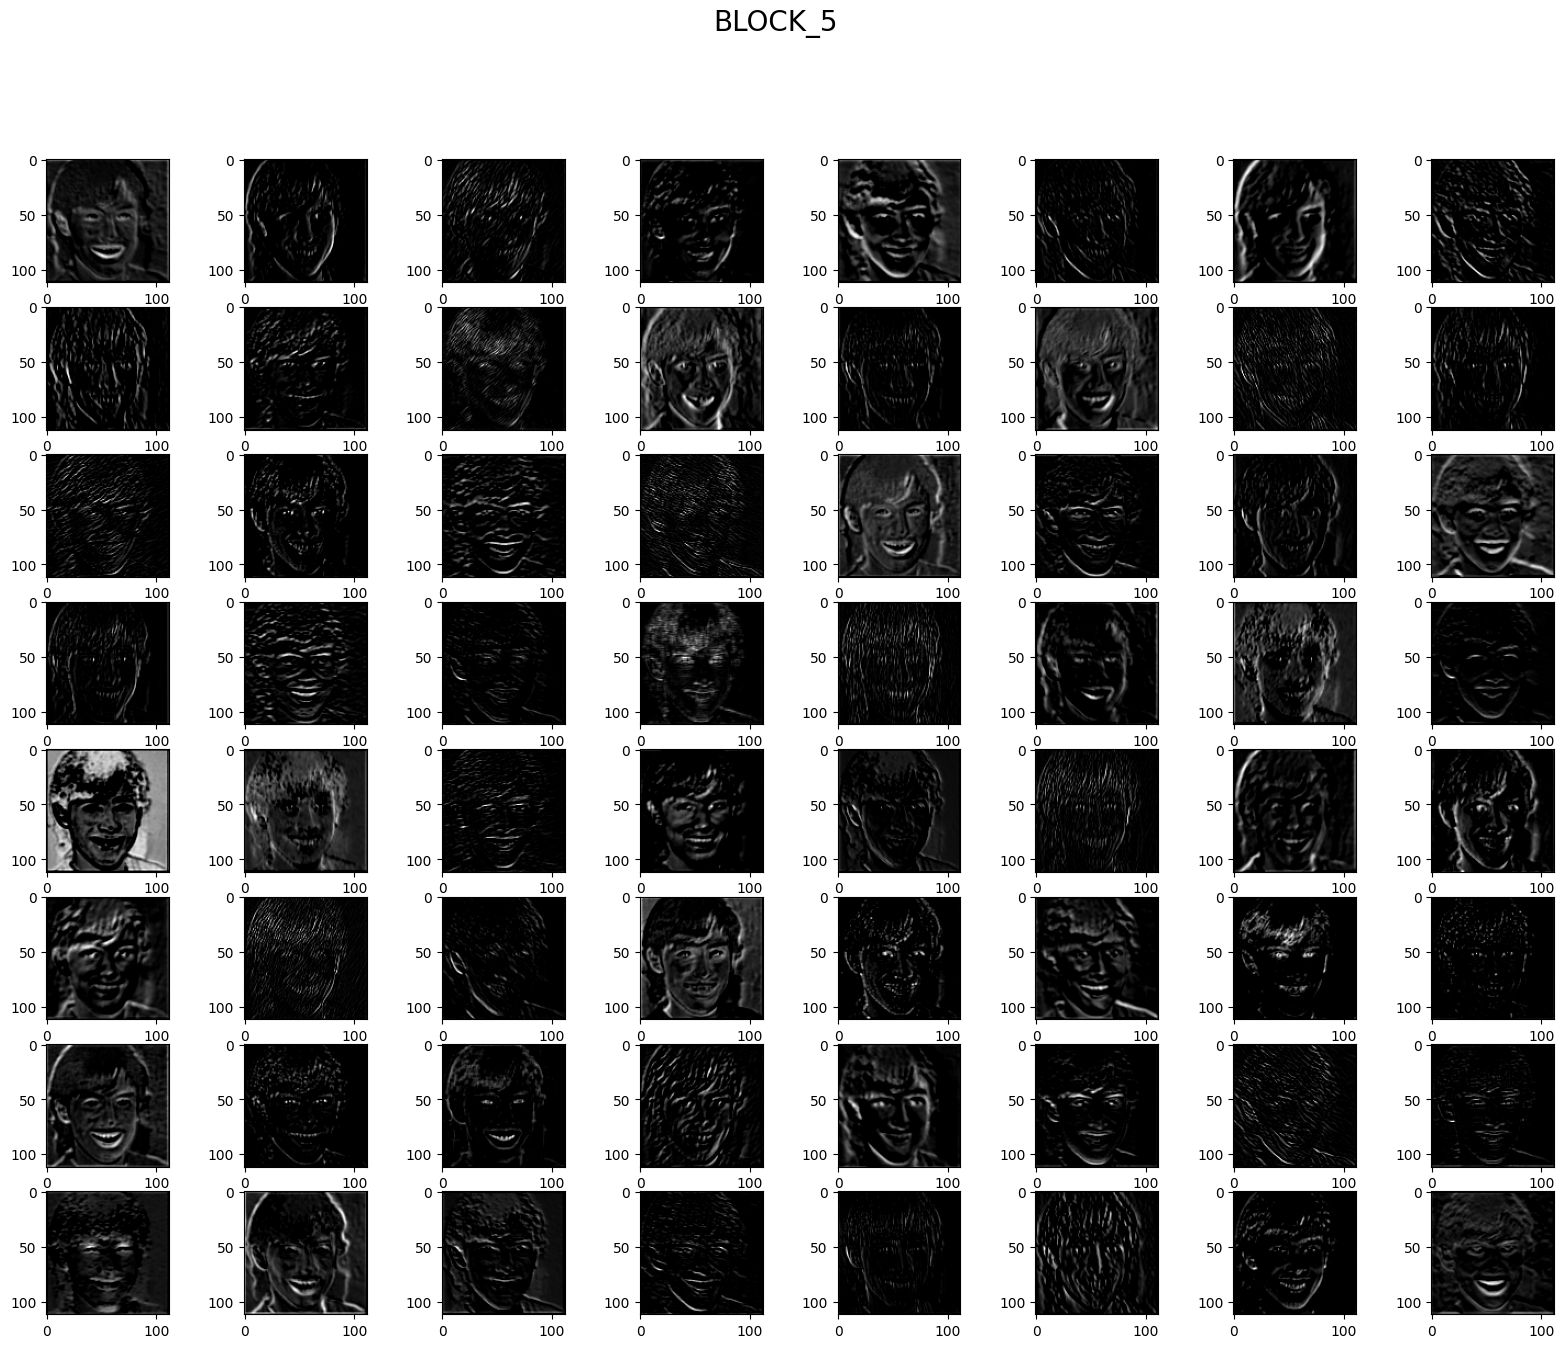

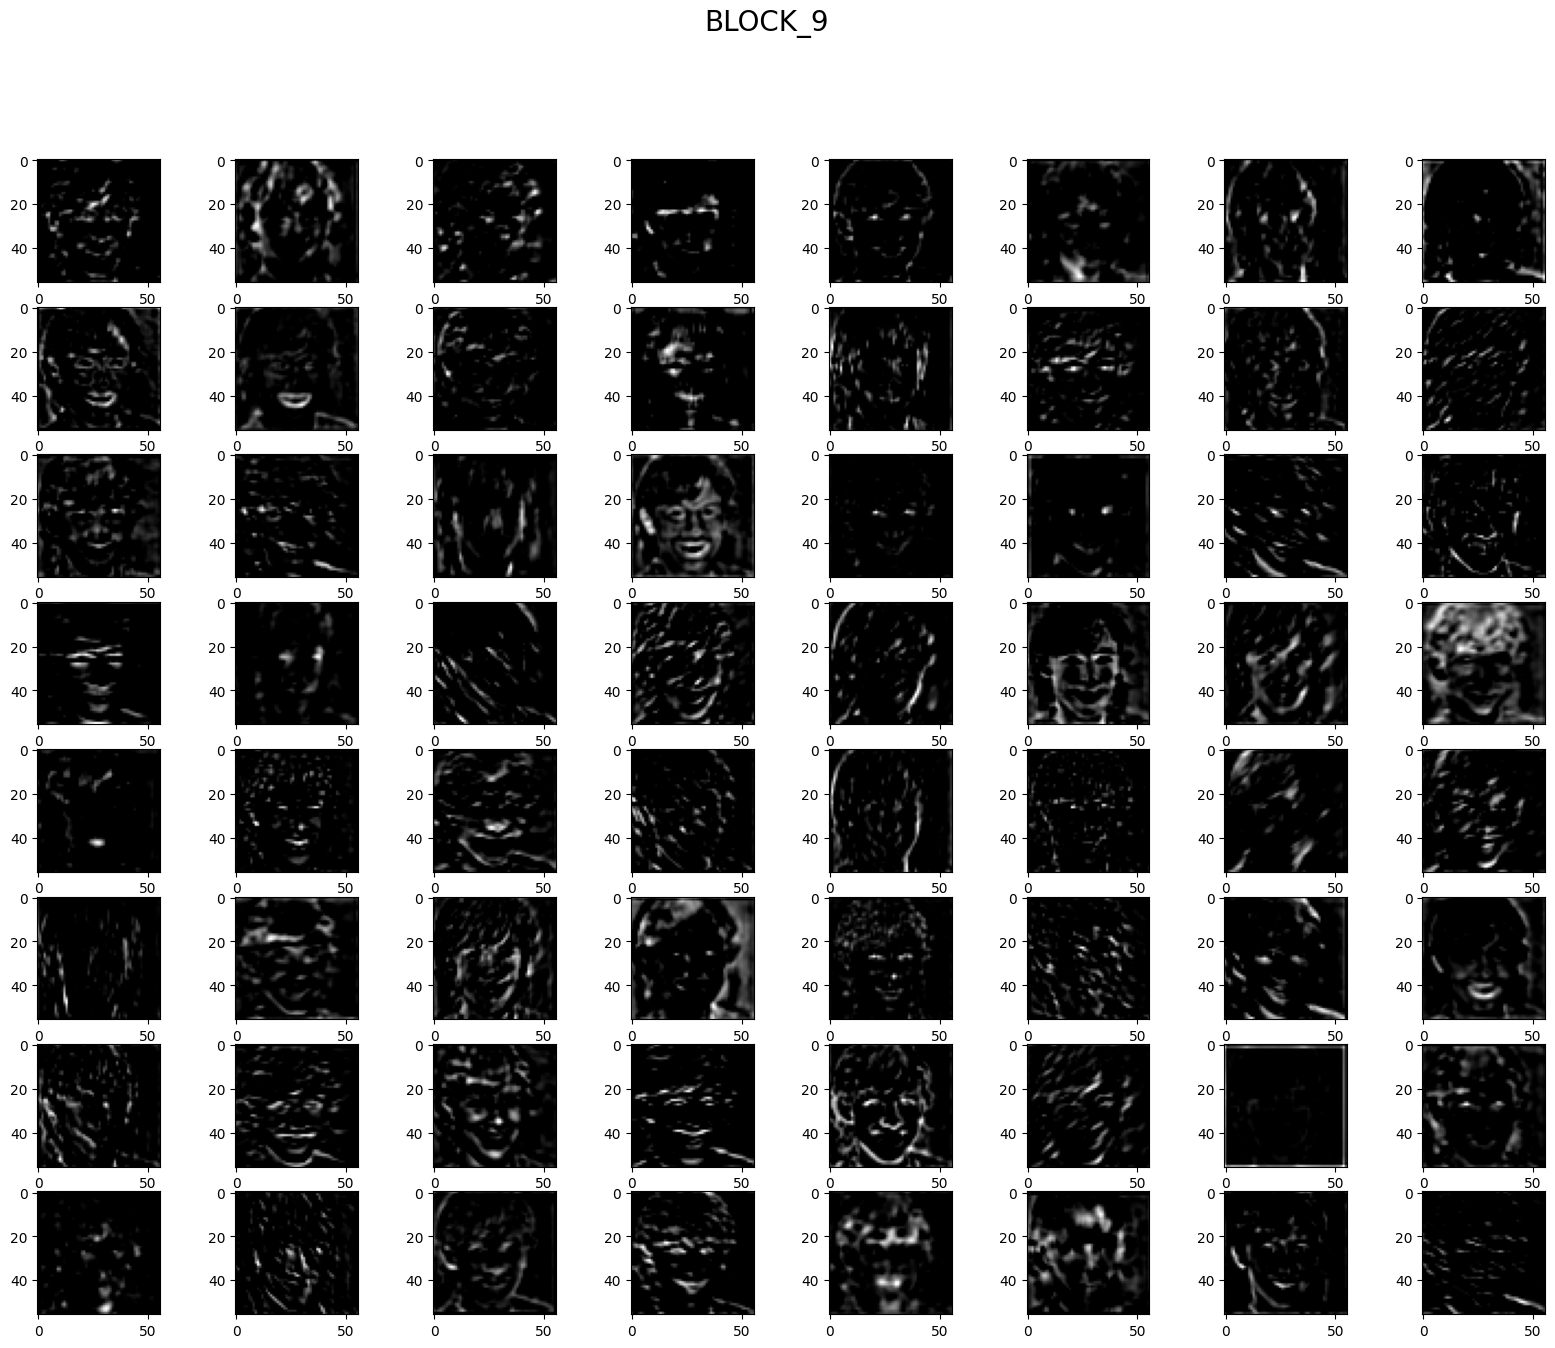

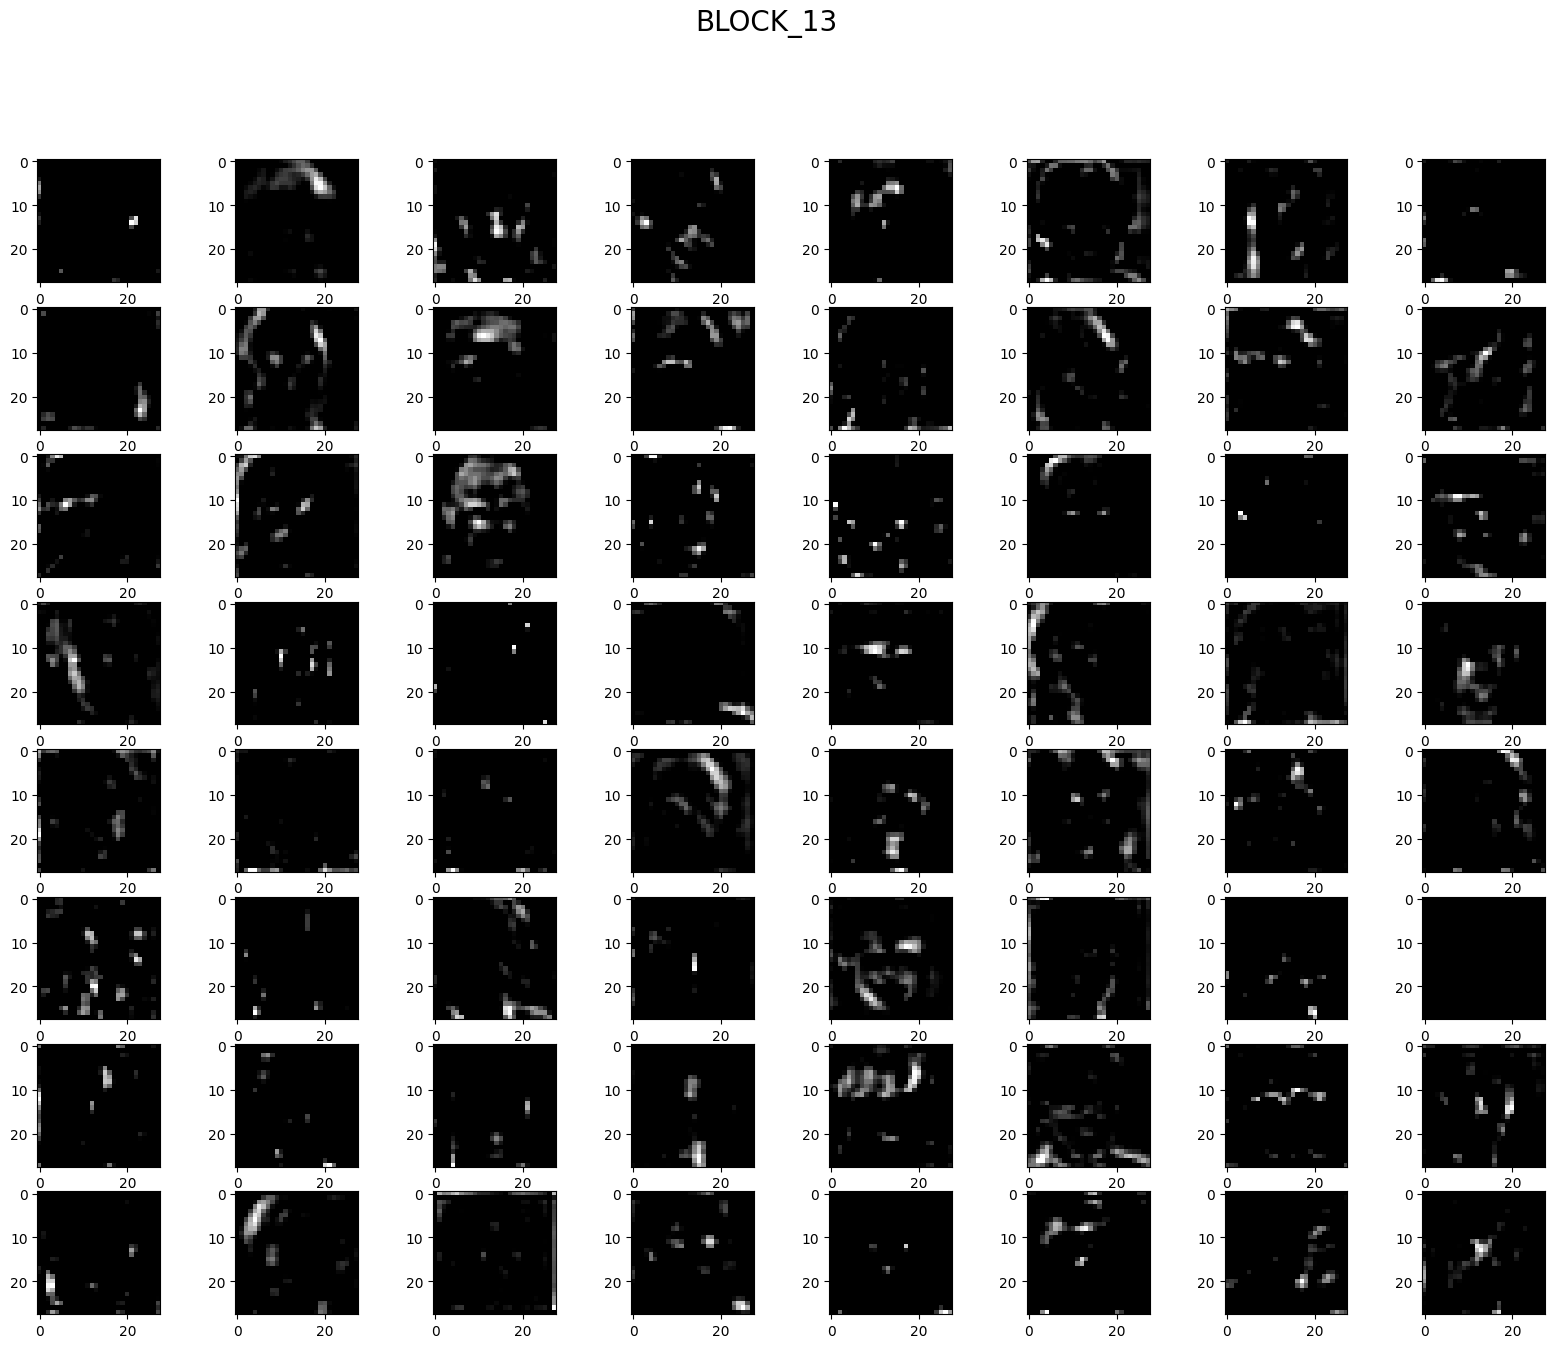

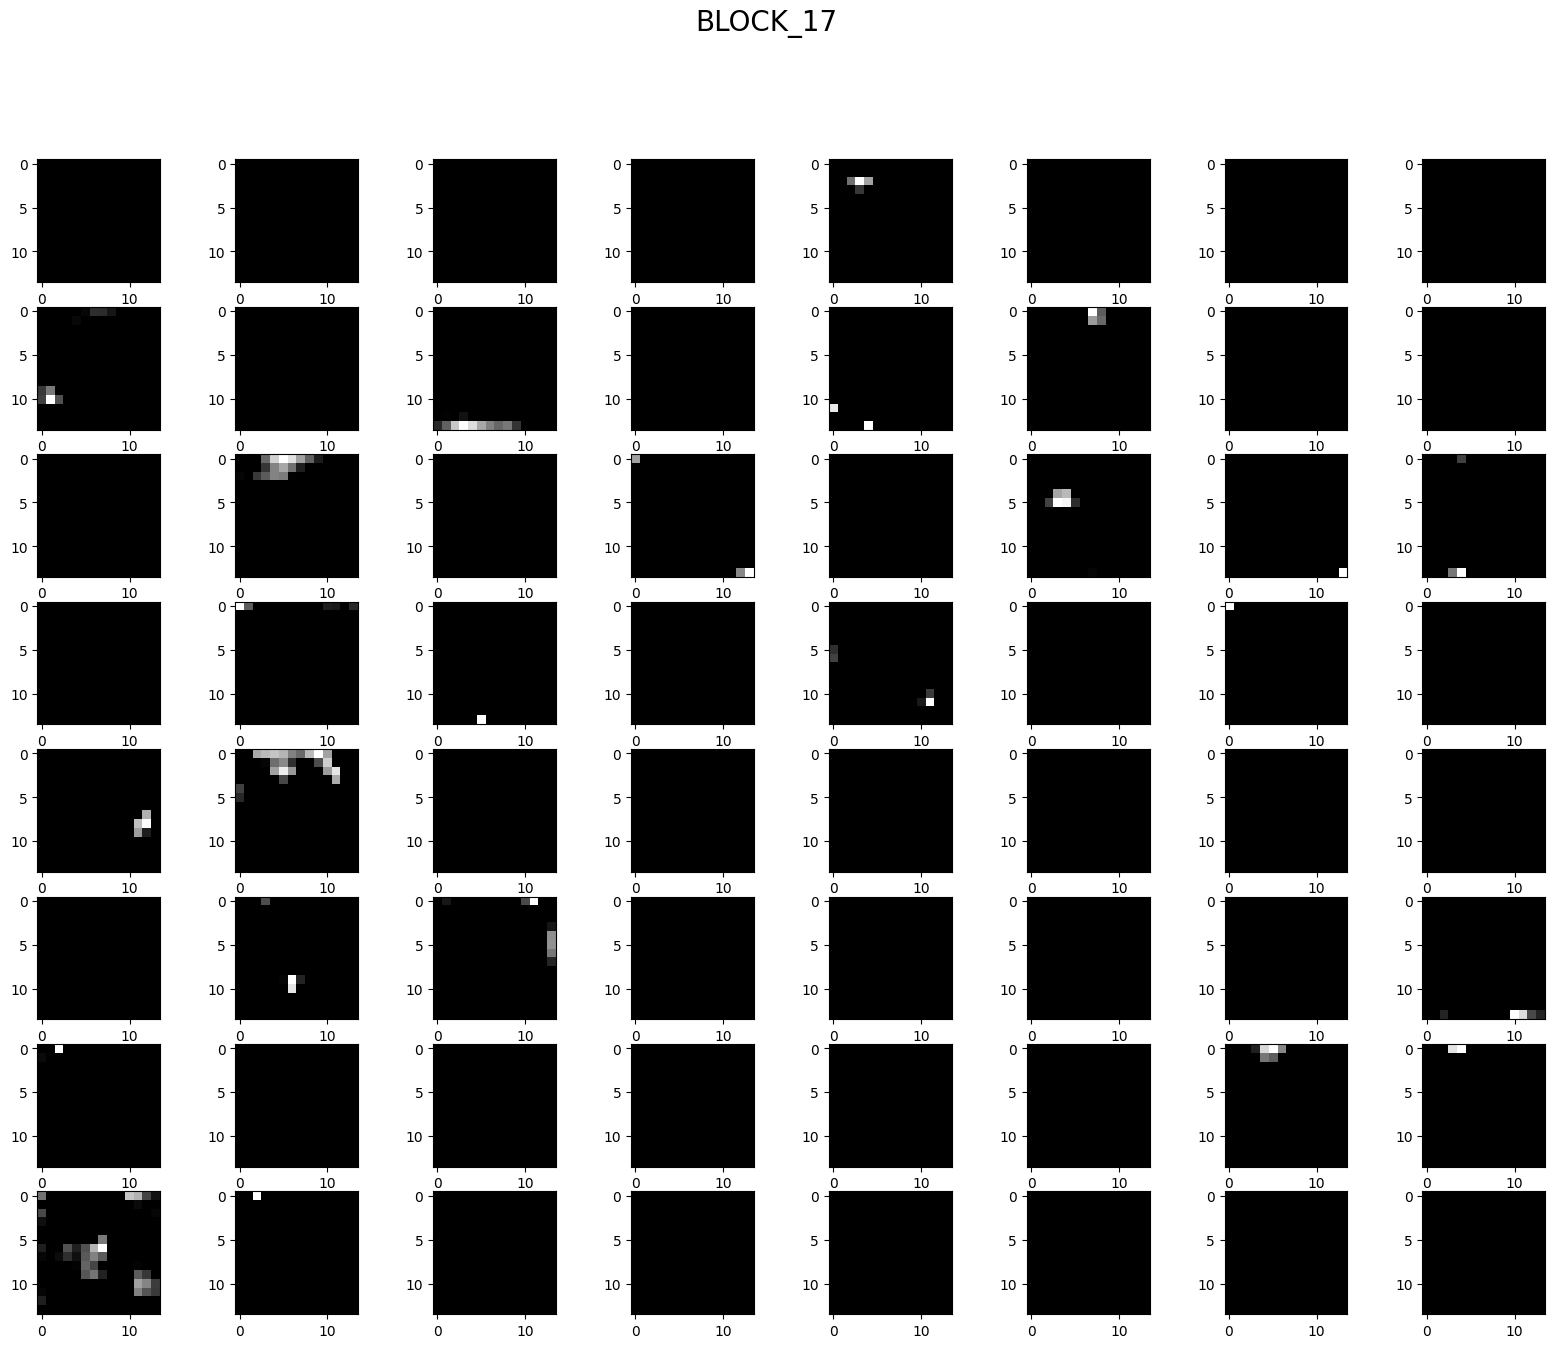

In [22]:
feature_map = model2.predict(image)

for i,fmap in zip(blocks,feature_map):
    fig = pyplot.figure(figsize=(20,15))
    #https://stackoverflow.com/a/12444777
    fig.suptitle("BLOCK_{}".format(i) , fontsize=20)
    for i in range(1,features.shape[3]+1):

        pyplot.subplot(8,8,i)
        pyplot.imshow(fmap[0,:,:,i-1] , cmap='gray')

pyplot.show()